Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [4]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [5]:
import glob
import os

PATH = os.getcwd()+ "/Data"

all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    

# use pd.set_option here to display in a nice way
df_from_each_file = (pd.read_csv(f) for f in all_files) 
df_concatenated = pd.concat(df_from_each_file, ignore_index=True) # combines all dataframes and creates new dataframe

# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'

df_concatenated.to_csv(DATAPATH) # write concatenated to a csv in the Processed folder

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [6]:
# add a column "congruence"
# creates new column to check whether stimulus type and response match
df_concatenated['congruence'] = df_concatenated['StimulusType'] == df_concatenated['response'] 

# create a new dataframe with averaged dat
df_concatenated_avg = pd.DataFrame(columns=['accuracy','RT'])
df_concatenated_avg_test = pd.DataFrame(columns=['SubjectID','StimulusType'])
df_concatenated_avg_test['SubjectID'] = df_concatenated['SubjectID']
df_concatenated_avg_test['StimulusType'] = df_concatenated['StimulusType']
df_concatenated_avg_test = df_concatenated_avg_test.drop_duplicates()
#df_concatenated_avg_test = df_concatenated_avg_test.reset_index()
#df_concatenated_avg = df_concatenated_avg.drop(columns=['index']) # deletes the column 'Index'
df_concatenated_copy = df_concatenated.copy() # creates a deep copy of old data frame
df_concatenated_copy = df_concatenated_copy.drop(columns=['response']) # deletes the column 'response'
# calculates the mean congruence for different combinations of SubjectID and StimulusType
#df_concatenated_avg['SubjectID'] = df_concatenated_copy['SubjectID']
#df_concatenated_avg['StimulusType'] = df_concatenated_copy['StimulusType']
df_concatenated_avg['accuracy'] = df_concatenated_copy.groupby(['SubjectID', 'StimulusType'])['congruence'].mean()
# calculates the mean RT while omitting 0 values for different combinations of SubjectID and StimulusType 
df_concatenated_avg['RT'] = df_concatenated_copy.groupby(['SubjectID', 'StimulusType'])['RT'].mean() 

#df_concatenated_avg['SubjectID'] = df_concatenated_avg_test['SubjectID']
#df_concatenated_avg['StimulusType'] = df_concatenated_avg_test['StimulusType']
df_concatenated_avg = df_concatenated_avg.reset_index()

# saves averaged dataframe as a csv file
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH, index=False)

In [171]:
df_concatenated_avg

,SubjectID,StimulusType,accuracy,RT
0,8001,0,0.7000,90.6000
1,8001,1,1.0000,342.2125
2,8002,0,0.8500,49.2000
3,8002,1,1.0000,357.7625
4,8003,0,1.0000,0.0000
5,8003,1,1.0000,435.1625
6,8004,0,0.9000,32.1500
7,8004,1,0.9875,340.2125
8,8005,0,0.7000,99.7500
9,8005,1,1.0000,321.7500


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

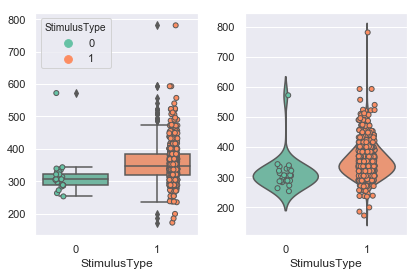

In [7]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

#masking 0 RT values
RT_values = np.ma.array(data_concat["RT"])
RT_values_masked = np.ma.masked_where(RT_values == 0, RT_values)

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2)


sns.boxplot(x="StimulusType", y=RT_values_masked, data = data_concat, palette="Set2", ax=axes[0])
sns.stripplot(x="StimulusType", y=RT_values_masked, data=data_concat, jitter=True, hue="StimulusType", palette="Set2", dodge=True, linewidth=1, edgecolor='gray', ax=axes[0])


sns.violinplot(x="StimulusType", y=RT_values_masked, data=data_concat, palette="Set2", inner=None, ax=axes[1])
sns.stripplot(x="StimulusType", y=RT_values_masked, data=data_concat, palette="Set2", jitter=True, dodge=True, linewidth=1, edgecolor='gray', ax=axes[1])

#handles, labels = axes.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
#fig.legend(labels=['Go','NoGo'], loc="upper right")
#l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig.tight_layout()


### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

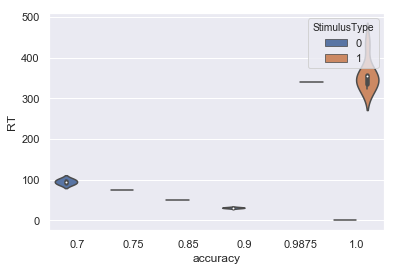

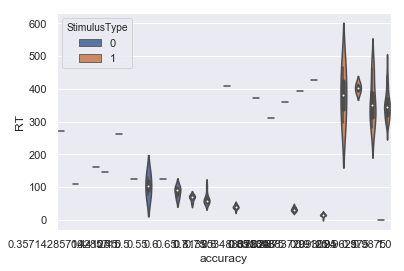

In [173]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
# TODO
PATH = os.getcwd()+ "/Class_Data"

class_all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    

# use pd.set_option here to display in a nice way
class_df_from_each_file = (pd.read_csv(f) for f in class_all_files) 
class_df_concatenated = pd.concat(class_df_from_each_file, ignore_index=True) # combines all dataframes and creates new dataframe
# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/class_data_concatenated.csv'

class_df_concatenated.to_csv(DATAPATH, index=False) # write concatenated to a csv in the Processed folder
# add a column "congruence"
# creates new column to check whether stimulus type and response match
class_df_concatenated['congruence'] = class_df_concatenated['StimulusType'] == class_df_concatenated['response'] 

# create a new dataframe with averaged dat
class_df_concatenated_avg = pd.DataFrame(columns=['accuracy','RT'])
class_df_concatenated_avg_test = pd.DataFrame(columns=['SubjectID','StimulusType'])
class_df_concatenated_avg_test['SubjectID'] = class_df_concatenated['SubjectID']
class_df_concatenated_avg_test['StimulusType'] = class_df_concatenated['StimulusType']
class_df_concatenated_avg_test = class_df_concatenated_avg_test.drop_duplicates()
#df_concatenated_avg_test = df_concatenated_avg_test.reset_index()
#df_concatenated_avg = df_concatenated_avg.drop(columns=['index']) # deletes the column 'Index'
class_df_concatenated_copy = class_df_concatenated.copy() # creates a deep copy of old data frame
class_df_concatenated_copy = class_df_concatenated_copy.drop(columns=['response']) # deletes the column 'response'
# calculates the mean congruence for different combinations of SubjectID and StimulusType
#df_concatenated_avg['SubjectID'] = df_concatenated_copy['SubjectID']
#df_concatenated_avg['StimulusType'] = df_concatenated_copy['StimulusType']
class_df_concatenated_avg['accuracy'] = class_df_concatenated_copy.groupby(['SubjectID', 'StimulusType'])['congruence'].mean()
# calculates the mean RT while omitting 0 values for different combinations of SubjectID and StimulusType 
class_df_concatenated_avg['RT'] = class_df_concatenated_copy.groupby(['SubjectID', 'StimulusType'])['RT'].mean() 

#df_concatenated_avg['SubjectID'] = df_concatenated_avg_test['SubjectID']
#df_concatenated_avg['StimulusType'] = df_concatenated_avg_test['StimulusType']
class_df_concatenated_avg = class_df_concatenated_avg.reset_index()

# saves averaged dataframe as a csv file
DATAPATH = os.getcwd() + '/Processed/class_data_concatenated_averaged.csv'
class_df_concatenated_avg.to_csv(DATAPATH, index=False)

# Now it's time to plot your results
figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")

# violin plot for your group's data
figGroup, ax=plt.subplots(num=1, clear=True)
figGroup = sns.violinplot(x="accuracy", y="RT", hue="StimulusType", data=df_concatenated_avg)

# violin plot of all group's data
figClass, ax=plt.subplots(num=2, clear=True)
figClass = sns.violinplot(x="accuracy", y="RT", hue="StimulusType", data=class_df_concatenated_avg)


Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

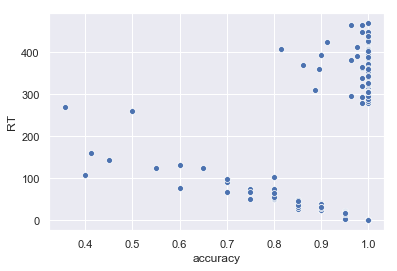

In [174]:
# TODO
fig = sns.scatterplot(x="accuracy", y="RT", data=class_df_concatenated_avg)